# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**YOUR NAME, YOUR SURNAME**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

In [1]:
# Libraries for data loading, data manipulation and data visulisation
import numpy as np
import pandas as pd

# Libraries for data preparation and model building
import matplotlib.pyplot as plt
import seaborn as sns


In [49]:
df = pd.read_csv('df_train.csv', index_col=0)
df.head()

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


In [50]:
df_test = pd.read_csv('df_test.csv', index_col=0)
df_test.head()

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
8763,2018-01-01 00:00:00,5.000000,level_8,0.0,5.000000,87.000000,71.333333,20.000000,3.000000,0.000000,...,287.816667,280.816667,287.356667,276.150000,280.380000,286.816667,285.150000,283.150000,279.866667,279.150000
8764,2018-01-01 03:00:00,4.666667,level_8,0.0,5.333333,89.000000,78.000000,0.000000,3.666667,0.000000,...,284.816667,280.483333,284.190000,277.816667,281.010000,283.483333,284.150000,281.150000,279.193333,278.150000
8765,2018-01-01 06:00:00,2.333333,level_7,0.0,5.000000,89.000000,89.666667,0.000000,2.333333,6.666667,...,284.483333,276.483333,283.150000,276.816667,279.196667,281.816667,282.150000,280.483333,276.340000,276.150000
8766,2018-01-01 09:00:00,2.666667,level_7,0.0,5.333333,93.333333,82.666667,26.666667,5.666667,6.666667,...,284.150000,277.150000,283.190000,279.150000,281.740000,282.150000,284.483333,279.150000,275.953333,274.483333
8767,2018-01-01 12:00:00,4.000000,level_7,0.0,8.666667,65.333333,64.000000,26.666667,10.666667,0.000000,...,287.483333,281.150000,286.816667,281.816667,284.116667,286.150000,286.816667,284.483333,280.686667,280.150000


In [51]:
df = pd.concat([df, df_test], ignore_index=True)  # Concatenate vertically, ignoring original indices
df

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.000000,1.000000,0.0,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.000000,1.000000,0.0,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.000000,1.000000,0.0,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.000000,1.000000,0.0,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.000000,0.333333,0.0,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11678,2018-12-31 09:00:00,0.333333,level_9,0.0,2.000000,81.666667,49.666667,80.000000,1.333333,0.0,...,281.483333,278.140000,270.816667,273.210000,276.483333,276.150000,279.816667,274.910000,271.150000,NaN
11679,2018-12-31 12:00:00,0.333333,level_8,0.0,1.333333,61.000000,28.333333,56.666667,1.000000,0.0,...,287.816667,286.150000,278.150000,278.443333,285.816667,278.816667,287.150000,283.156667,280.483333,NaN
11680,2018-12-31 15:00:00,1.000000,level_6,0.0,3.000000,47.000000,26.333333,0.000000,0.666667,0.0,...,288.816667,288.820000,284.150000,285.073333,288.150000,285.816667,290.816667,287.733333,286.483333,NaN
11681,2018-12-31 18:00:00,1.000000,level_6,0.0,2.000000,52.666667,56.666667,0.000000,0.666667,0.0,...,285.150000,284.473333,280.150000,281.626667,283.150000,282.816667,287.483333,283.813333,282.150000,NaN


In [52]:
df.shape

(11683, 48)

In [53]:
df.describe()

,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
count,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,...,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,8763.000000
mean,2.433750,0.118698,2.692873,63.774687,58.721818,43.440712,1.958629,14.155268,159.878855,2.782419,...,289.377372,289.869413,284.993657,286.447784,288.616766,288.095397,291.263219,288.282055,287.056222,10673.857612
std,1.831762,0.334918,2.321759,22.219380,24.390621,32.046215,1.696043,24.541321,101.005654,1.758587,...,9.594562,6.680538,6.730076,6.738466,6.391989,6.898601,8.136234,9.258559,9.093455,5218.046404
min,0.000000,0.000000,0.000000,8.333333,6.333333,0.000000,0.000000,0.000000,0.000000,0.000000,...,264.983333,270.816667,264.483333,267.483333,269.483333,269.063000,270.150000,264.983333,264.983333,-6618.000000
25%,1.000000,0.000000,1.000000,46.333333,38.000000,12.000000,1.000000,0.000000,76.666667,1.333333,...,282.150000,284.816667,280.122526,281.483448,284.150000,283.150000,285.483333,281.250000,280.150000,7390.333333
50%,2.000000,0.000000,2.000000,67.000000,59.333333,45.000000,1.333333,0.000000,145.666667,2.333333,...,287.843333,289.426667,284.816667,286.193333,288.276333,287.816667,290.382000,286.923333,285.816667,11114.666667
75%,3.333333,0.100000,3.666667,83.000000,80.000000,75.000000,2.666667,20.000000,233.333333,3.666667,...,296.483333,295.150000,289.816667,291.040000,293.483333,292.483333,296.641333,294.993167,293.708917,14498.166667
max,13.333333,3.000000,52.000000,100.000000,100.000000,100.000000,12.666667,97.333333,360.000000,12.666667,...,314.483333,308.150000,309.816667,310.710000,306.816667,317.966667,314.816667,313.133333,310.383333,31904.000000


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11683 entries, 0 to 11682
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   time                  11683 non-null  object 
 1   Madrid_wind_speed     11683 non-null  float64
 2   Valencia_wind_deg     11683 non-null  object 
 3   Bilbao_rain_1h        11683 non-null  float64
 4   Valencia_wind_speed   11683 non-null  float64
 5   Seville_humidity      11683 non-null  float64
 6   Madrid_humidity       11683 non-null  float64
 7   Bilbao_clouds_all     11683 non-null  float64
 8   Bilbao_wind_speed     11683 non-null  float64
 9   Seville_clouds_all    11683 non-null  float64
 10  Bilbao_wind_deg       11683 non-null  float64
 11  Barcelona_wind_speed  11683 non-null  float64
 12  Barcelona_wind_deg    11683 non-null  float64
 13  Madrid_clouds_all     11683 non-null  float64
 14  Seville_wind_speed    11683 non-null  float64
 15  Barcelona_rain_1h  

In [55]:
df.isnull().sum()

time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2522
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather_id          0
Seville_temp  

In [56]:
df['Valencia_pressure']=df['Valencia_pressure'].fillna(df.Valencia_pressure.mean()) # replacing NaN with mean

In [57]:
df.corr()

,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
Madrid_wind_speed,1.000000,0.247761,0.524549,-0.114347,-0.116172,0.225566,0.382617,0.185177,0.272466,0.272295,...,0.064625,0.051990,0.051152,0.036799,0.059285,0.020677,0.077828,0.078077,0.064200,-0.150981
Bilbao_rain_1h,0.247761,1.000000,0.240118,0.063048,0.098192,0.361385,0.075120,0.074137,0.255858,0.070787,...,-0.148284,-0.138938,-0.143191,-0.182022,-0.114654,-0.219710,-0.120818,-0.137182,-0.120395,-0.152510
Valencia_wind_speed,0.524549,0.240118,1.000000,-0.095533,-0.029066,0.192272,0.398683,0.146475,0.255511,0.350592,...,-0.020645,-0.016290,-0.002094,-0.014087,0.005129,-0.024867,0.002894,-0.012830,-0.024767,-0.142791
Seville_humidity,-0.114347,0.063048,-0.095533,1.000000,0.794435,0.055132,-0.096654,0.397249,-0.118299,-0.154620,...,-0.699489,-0.605897,-0.593035,-0.589058,-0.581922,-0.563753,-0.776715,-0.703010,-0.675070,-0.167290
Madrid_humidity,-0.116172,0.098192,-0.029066,0.794435,1.000000,0.033094,-0.012729,0.363340,-0.091650,-0.065749,...,-0.798668,-0.677792,-0.626489,-0.620312,-0.636039,-0.590620,-0.764148,-0.795066,-0.757692,-0.150536
Bilbao_clouds_all,0.225566,0.361385,0.192272,0.055132,0.033094,1.000000,0.024394,0.037675,0.267920,0.081249,...,-0.060564,-0.035391,-0.082353,-0.126287,-0.025979,-0.170196,-0.089831,-0.059928,-0.060271,-0.127293
Bilbao_wind_speed,0.382617,0.075120,0.398683,-0.096654,-0.012729,0.024394,1.000000,0.132678,0.440740,0.268904,...,0.015822,0.008407,0.098830,0.131612,0.016688,0.166347,0.047191,0.019764,0.006009,-0.081602
Seville_clouds_all,0.185177,0.074137,0.146475,0.397249,0.363340,0.037675,0.132678,1.000000,0.042427,0.111393,...,-0.231967,-0.178549,-0.132287,-0.144719,-0.150584,-0.152165,-0.194561,-0.222425,-0.213539,-0.091804
Bilbao_wind_deg,0.272466,0.255858,0.255511,-0.118299,-0.091650,0.267920,0.440740,0.042427,1.000000,0.176470,...,0.051832,0.080329,0.110097,0.084298,0.094344,0.052073,0.080600,0.063938,0.062808,-0.120800
Barcelona_wind_speed,0.272295,0.070787,0.350592,-0.154620,-0.065749,0.081249,0.268904,0.111393,0.176470,1.000000,...,0.071381,0.095109,0.110704,0.106629,0.083827,0.094279,0.122419,0.072738,0.063878,-0.103633


In [58]:
# As before, we create the correlation matrix
# and find rows and columnd where correlation coefficients > 0.9 or <-0.9
corr = df.corr()
r, c = np.where(np.abs(corr) > 0.9)

# We are only interested in the off diagonal entries:
off_diagonal = np.where(r != c)

# Show the correlation matrix rows and columns where we have highly correlated off diagonal entries:
df_corr = corr.iloc[r[off_diagonal], c[off_diagonal]].T
df_corr

,Seville_temp_max,Valencia_temp_max,Valencia_temp_max,Valencia_temp_max,Valencia_temp_max,Valencia_temp_max,Valencia_temp_max,Valencia_temp,Valencia_temp,Valencia_temp,...,Madrid_temp,Madrid_temp,Madrid_temp,Madrid_temp,Madrid_temp,Madrid_temp,Madrid_temp,Madrid_temp_min,Madrid_temp_min,Madrid_temp_min
Seville_temp,0.922956,0.880606,0.880606,0.880606,0.880606,0.880606,0.880606,0.865698,0.865698,0.865698,...,0.912556,0.912556,0.912556,0.912556,0.912556,0.912556,0.912556,0.873634,0.873634,0.873634
Valencia_temp,0.729800,0.989145,0.989145,0.989145,0.989145,0.989145,0.989145,1.000000,1.000000,1.000000,...,0.917144,0.917144,0.917144,0.917144,0.917144,0.917144,0.917144,0.881040,0.881040,0.881040
Valencia_temp_min,0.677777,0.956864,0.956864,0.956864,0.956864,0.956864,0.956864,0.988047,0.988047,0.988047,...,0.899039,0.899039,0.899039,0.899039,0.899039,0.899039,0.899039,0.868788,0.868788,0.868788
Barcelona_temp_max,0.745564,0.925159,0.925159,0.925159,0.925159,0.925159,0.925159,0.910912,0.910912,0.910912,...,0.904874,0.904874,0.904874,0.904874,0.904874,0.904874,0.904874,0.866011,0.866011,0.866011
Madrid_temp_max,0.781381,0.920765,0.920765,0.920765,0.920765,0.920765,0.920765,0.918433,0.918433,0.918433,...,0.990703,0.990703,0.990703,0.990703,0.990703,0.990703,0.990703,0.950082,0.950082,0.950082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Seville_temp_min,0.783148,0.884222,0.884222,0.884222,0.884222,0.884222,0.884222,0.883368,0.883368,0.883368,...,0.937541,0.937541,0.937541,0.937541,0.937541,0.937541,0.937541,0.911220,0.911220,0.911220
Madrid_temp_min,0.705108,0.875728,0.875728,0.875728,0.875728,0.875728,0.875728,0.881040,0.881040,0.881040,...,0.978677,0.978677,0.978677,0.978677,0.978677,0.978677,0.978677,1.000000,1.000000,1.000000
Madrid_temp_max,0.781381,0.920765,0.920765,0.920765,0.920765,0.920765,0.920765,0.918433,0.918433,0.918433,...,0.990703,0.990703,0.990703,0.990703,0.990703,0.990703,0.990703,0.950082,0.950082,0.950082
Seville_temp_min,0.783148,0.884222,0.884222,0.884222,0.884222,0.884222,0.884222,0.883368,0.883368,0.883368,...,0.937541,0.937541,0.937541,0.937541,0.937541,0.937541,0.937541,0.911220,0.911220,0.911220


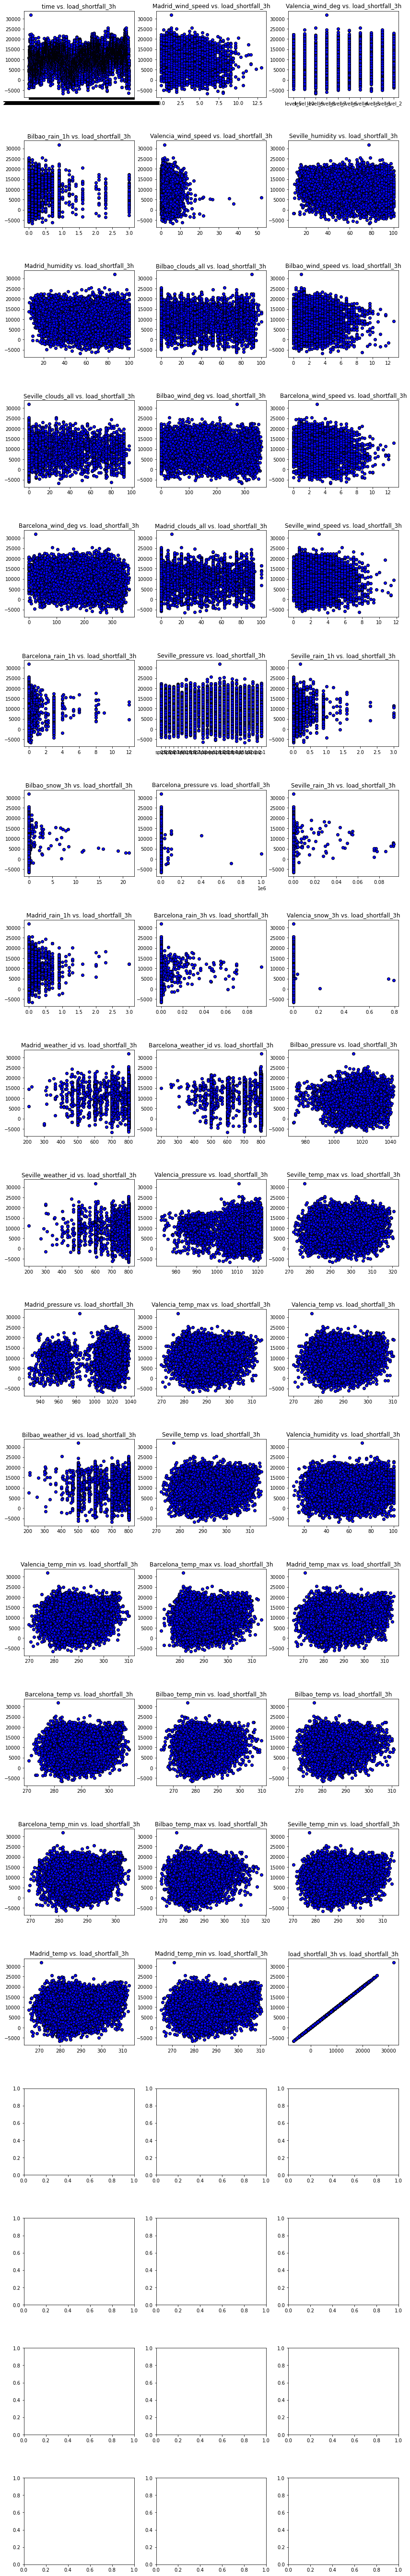

In [22]:
fig, axs = plt.subplots(20,3, figsize=(14,98),)
fig.subplots_adjust(hspace = 0.5, wspace=.2)
axs = axs.ravel()

for index, column in enumerate(df.columns):
    axs[index].set_title("{} vs. load_shortfall_3h".format(column))
    axs[index].scatter(x=df[column],y=df['load_shortfall_3h'],color='blue',edgecolor='k')

In [59]:
# create new featuresimport pandas as pd

# Assuming df is your DataFrame with the 'time' column as an object
# Convert the 'time' column to datetime format
df['time'] = pd.to_datetime(df['time'])

# Extract year, month, day of the week, and hour
df['year'] = df['time'].dt.year
df['month'] = df['time'].dt.month
df['day'] = df['time'].dt.day
df['day_of_week'] = df['time'].dt.dayofweek  # Monday is 0 and Sunday is 6
df['hour'] = df['time'].dt.hour

# Mapping numerical day of the week to string representation
day_of_week_mapping = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}
df['day_of_week'] = df['day_of_week'].map(day_of_week_mapping)

month_mapping = {
    1: 'January',
    2: 'Febuary',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}
df['month'] = df['month'].map(month_mapping)

# Print the DataFrame to see the results
df = df.set_index('time')
df.head()


,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h,year,month,day,day_of_week,hour
time,,,,,,,,,,,,,,,,,,,,,
2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,...,269.338615,274.254667,265.938000,265.938000,6715.666667,2015,January,1,Thursday,3
2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,...,270.376000,274.945000,266.386667,266.386667,4171.666667,2015,January,1,Thursday,6
2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,...,275.027229,278.792000,272.708667,272.708667,4274.666667,2015,January,1,Thursday,9
2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,...,281.135063,285.394000,281.895219,281.895219,5075.666667,2015,January,1,Thursday,12
2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,...,282.252063,285.513719,280.678437,280.678437,6620.666667,2015,January,1,Thursday,15


In [48]:
df.head()

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h,year,month,day,day_of_week,hour
time,,,,,,,,,,,,,,,,,,,,,
2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,...,269.338615,274.254667,265.938000,265.938000,6715.666667,2015,January,1,Thursday,3
2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,...,270.376000,274.945000,266.386667,266.386667,4171.666667,2015,January,1,Thursday,6
2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,...,275.027229,278.792000,272.708667,272.708667,4274.666667,2015,January,1,Thursday,9
2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,...,281.135063,285.394000,281.895219,281.895219,5075.666667,2015,January,1,Thursday,12
2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,...,282.252063,285.513719,280.678437,280.678437,6620.666667,2015,January,1,Thursday,15


In [60]:
df_copy = df.copy()


In [61]:
df_copy = pd.get_dummies(df_copy)
# Again we make sure that all the column names have underscores instead of whitespaces
df_copy.columns = [col.replace(" ","_") for col in df_copy.columns] 

df_copy.head()

,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,...,month_November,month_October,month_September,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
time,,,,,,,,,,,,,,,,,,,,,
2015-01-01 03:00:00,0.666667,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,6.333333,...,0,0,0,0,0,0,0,1,0,0
2015-01-01 06:00:00,0.333333,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,4.000000,...,0,0,0,0,0,0,0,1,0,0
2015-01-01 09:00:00,1.000000,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,2.000000,...,0,0,0,0,0,0,0,1,0,0
2015-01-01 12:00:00,1.000000,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,2.333333,...,0,0,0,0,0,0,0,1,0,0
2015-01-01 15:00:00,1.000000,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,4.333333,...,0,0,0,0,0,0,0,1,0,0


In [62]:
df_copy_Alt = df_copy.copy()

df_copy_Alt['Seville_temp_avg'] = df_copy_Alt[['Seville_temp', 'Seville_temp_max', 'Seville_temp_min']].mean(axis=1)
df_copy_Alt['Valencia_temp_avg'] = df_copy_Alt[['Valencia_temp', 'Valencia_temp_max', 'Valencia_temp_min']].mean(axis=1)
df_copy_Alt['Barcelona_temp_avg'] = df_copy_Alt[['Barcelona_temp', 'Barcelona_temp_max', 'Barcelona_temp_min']].mean(axis=1)
df_copy_Alt['Madrid_temp_avg'] = df_copy_Alt[['Madrid_temp', 'Madrid_temp_max', 'Madrid_temp_min']].mean(axis=1)
df_copy_Alt['Bilbao_temp_avg'] = df_copy_Alt[['Bilbao_temp', 'Bilbao_temp_max', 'Bilbao_temp_min']].mean(axis=1)

df_copy_Alt = df_copy_Alt.drop(['Seville_temp', 'Seville_temp_max', 'Seville_temp_min',
                   'Valencia_temp', 'Valencia_temp_max', 'Valencia_temp_min',
                   'Barcelona_temp', 'Barcelona_temp_max', 'Barcelona_temp_min',
                   'Madrid_temp', 'Madrid_temp_max', 'Madrid_temp_min',
                   'Bilbao_temp', 'Bilbao_temp_max', 'Bilbao_temp_min'], axis=1)

df_copy_Alt.head()

,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,...,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,Seville_temp_avg,Valencia_temp_avg,Barcelona_temp_avg,Madrid_temp_avg,Bilbao_temp_avg
time,,,,,,,,,,,,,,,,,,,,,
2015-01-01 03:00:00,0.666667,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,6.333333,...,0,0,1,0,0,274.254667,269.888000,281.013000,265.938000,269.338615
2015-01-01 06:00:00,0.333333,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,4.000000,...,0,0,1,0,0,274.945000,271.728333,280.561667,266.386667,270.376000
2015-01-01 09:00:00,1.000000,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,2.000000,...,0,0,1,0,0,278.792000,278.008667,281.583667,272.708667,275.027229
2015-01-01 12:00:00,1.000000,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,2.333333,...,0,0,1,0,0,285.394000,284.899552,283.434104,281.895219,281.135063
2015-01-01 15:00:00,1.000000,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,4.333333,...,0,0,1,0,0,285.513719,283.015115,284.213167,280.678437,282.252063


In [63]:
# split data into predictors and response

X_Alt = df_copy_Alt.drop('load_shortfall_3h', axis=1)
y_Alt = df_copy_Alt['load_shortfall_3h']

In [64]:

from sklearn.preprocessing import StandardScaler

# create scaler object
scaler = StandardScaler()

# create scaled version of the predictors (there is no need to scale the response)
X_scaled_Alt = scaler.fit_transform(X_Alt)

# convert the scaled predictor values into a dataframe
X_standardise_Alt = pd.DataFrame(X_scaled_Alt,columns=X_Alt.columns)

In [65]:
len(X_standardise_Alt)-len(df_test)

8763

In [66]:
y_Alt

time
2015-01-01 03:00:00    6715.666667
2015-01-01 06:00:00    4171.666667
2015-01-01 09:00:00    4274.666667
2015-01-01 12:00:00    5075.666667
2015-01-01 15:00:00    6620.666667
                          ...     
2018-12-31 09:00:00            NaN
2018-12-31 12:00:00            NaN
2018-12-31 15:00:00            NaN
2018-12-31 18:00:00            NaN
2018-12-31 21:00:00            NaN
Name: load_shortfall_3h, Length: 11683, dtype: float64

In [67]:
y_Alt= y_Alt.iloc[(df.index < "2018-01-01 00:00:00")]

In [68]:
len(y_Alt)

8763

In [69]:
# Get the first 8763 rows as a DataFrame (assuming it's what you need)
df_test_stand = X_standardise_Alt.tail(2920)

# Convert the DataFrame to a NumPy array
X_scaled_Alt_test = df_test_stand.to_numpy()

In [70]:
# Get the first 8763 rows as a DataFrame (assuming it's what you need)
df_head = X_standardise_Alt.head(8763)

# Convert the DataFrame to a NumPy array
X_scaled_Alt = df_head.to_numpy()


In [71]:
type(X_scaled_Alt)

numpy.ndarray

In [72]:
type(X_scaled_Alt_test)

numpy.ndarray

In [73]:
# Import train/test split module
from sklearn.model_selection import train_test_split

# Split dataset into train and test sets
X_train_Alt, X_test_Alt, y_train_Alt, y_test_Alt = train_test_split(X_scaled_Alt,
                                                    y_Alt,
                                                    test_size=0.20,
                                                    random_state=1,
                                                    shuffle=False)

In [74]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error

In [75]:
# Import LASSO module
from sklearn.linear_model import Lasso

def Lasso_R(X,X_train, X_test, y_train):

    # Create LASSO model object, setting alpha to 0.01
    lasso = Lasso(alpha=0.1)
    lasso.fit(X_train, y_train)

    # Extract intercept from model
    inter_L = float(lasso.intercept_)

    train_lasso = lasso.predict(X_train)
    print('Train Lasso :', metrics.mean_squared_error(y_train, train_lasso, squared=False))

    test_lasso = lasso.predict(X_test)
    Test_MSE_L = np.sqrt(mean_squared_error(y_test_Alt,test_lasso))
    print('Test Lasso :', Test_MSE_L)
    return Test_MSE_L

In [76]:
Lasso_R(X_Alt,X_train_Alt, X_test_Alt,y_train_Alt)

Train Lasso : 4576.819380547051
Test Lasso : 4447.158040773965


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.689e+09, tolerance: 1.863e+07
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


4447.158040773965

In [77]:
from sklearn.ensemble import RandomForestRegressor
# Our forest consists of 100 trees with a max depth of 5 in this example
RF = RandomForestRegressor(n_estimators=100, max_depth=30, random_state = 12)
RF.fit(X_train_Alt,y_train_Alt)

train_RF = RF.predict(X_train_Alt)
print('Train RF :', metrics.mean_squared_error(y_train_Alt, train_RF, squared=False))

test_RF = RF.predict(X_test_Alt)
Test_RMSE_RF = np.sqrt(mean_squared_error(y_test_Alt,test_RF))
print('Test RMSE RF: ',Test_RMSE_RF)


Train RF : 1007.5227232261152
Test RMSE RF:  3950.415020066696


C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [78]:
from sklearn.svm import SVR
# Instantiate support vector regression model
sv_reg = SVR(kernel='rbf', gamma='auto', C=1)

sv_reg.fit(X_train_Alt,y_train_Alt)

train_SV = sv_reg.predict(X_train_Alt)
print('RF :', metrics.mean_squared_error(y_train_Alt, train_SV, squared=False))

test_SV = sv_reg.predict(X_test_Alt)
test_SV_RMSE = np.sqrt(mean_squared_error(y_test_Alt,test_SV))
print("Test RMSE: ", test_SV_RMSE)

C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


RF : 5168.9389370517
Test RMSE:  5356.246760507753


In [79]:
from sklearn.linear_model import Ridge
def Ridge_R(X,X_train, X_test, y_train):

    # Create ridge model
    ridge = Ridge(random_state=14)
    # Train the model
    ridge.fit(X_train, y_train)

    # Extract the model intercept value
    inter_R = float(ridge.intercept_)
    # Extract the model coefficient value
    coeff_R = pd.DataFrame(ridge.coef_, X.columns, columns=['Coefficient'])
    #print("for Rigge Intercept:", float(b0))

    train_ridge = ridge.predict(X_train)
    print('Train Ridge RMSE:', metrics.mean_squared_error(y_train, train_ridge, squared=False))

    test_ridge = ridge.predict(X_test)
    Test_Ridge_RMSE = np.sqrt(mean_squared_error(y_test_Alt,test_ridge))
    print('Test Ridge RMSE:', Test_Ridge_RMSE)
    return Test_Ridge_RMSE

In [80]:
Ridge_R(X_Alt, X_train_Alt, X_test_Alt, y_train_Alt)

Train Ridge RMSE: 4576.819237014714
Test Ridge RMSE: 4446.911482220077


C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


4446.911482220077

In [81]:
from sklearn.ensemble import GradientBoostingRegressor  # Or GradientBoostingClassifier for classification

GB_R = GradientBoostingRegressor(n_estimators=250, learning_rate=0.2, max_depth=6)  # Adjust parameters as needed

GB_R.fit(X_train_Alt, y_train_Alt)

train_GB_R = GB_R.predict(X_train_Alt)
print("Train GB_R: ", np.sqrt(mean_squared_error(y_train_Alt,train_GB_R)))

GB_R = GB_R.predict(X_test_Alt)
test_GB_RMSE = np.sqrt(mean_squared_error(y_test_Alt,GB_R))
print("Test GB_R: ", test_GB_RMSE)


Train GB_R:  528.196350822614
Test GB_R:  3570.6045392403403


In [ ]:
GB_R = GradientBoostingRegressor(n_estimators=100, learning_rate=0.2, max_depth=6)

#GB_R = GradientBoostingRegressor()  # Create a GBR model object
#GB_R.fit(X_train_Alt, y_train_Alt)


#type(X_scaled_Alt_test)
#test_pred = GB_R.predict(X_scaled_Alt_test)
test_pred = GB_R.predict(X_scaled_Alt_test)


In [ ]:
df_test['load_shortfall_3h']=test_pred
df_test.head()

In [46]:
test = df_test[['time', 'load_shortfall_3h']]
test.to_csv('test_df.csv', index=False) 

In [ ]:
# Choose best model and motivate why it is the best choice
Following an evaluation of various regression models, the Gradient Boosting Regressor emerged as the preferred choice 
based on its superior performance, as evidenced by the lowest RMSE score.

In [ ]:
# discuss chosen methods logic